<a href="https://colab.research.google.com/github/mimilazarova/DD2424-covid-xray-project/blob/master/covid_model_mimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import os

In [0]:
# pip install lime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_dirname = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data"

with open(os.path.join(data_dirname, 'testX.pickle'), 'rb') as f:
  testX = pickle.load(f)
with open(os.path.join(data_dirname, 'test_y.pickle'), 'rb') as f:
  test_y = pickle.load(f)

# testN = testX.shape[0]
# testX = testX.reshape((testN, 224, 224, 1))
# testX.shape

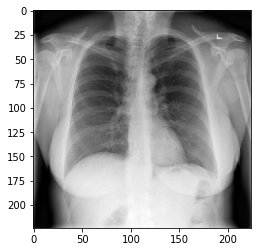

In [5]:
plt.imshow(testX[0], cmap='gray')

In [6]:
model_dirname = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/"
filename = "model8-undersampling-weights-augmentation.hdf5"
m = keras.models.load_model(os.path.join(model_dirname, filename))

def new_predict(images, model=m):
  N = images.shape[0]
  images = images.reshape((N, 224, 224, 1))
  return model.predict(images)

test_y_pred_m = new_predict(testX) #m.predict(testX)
test_y_pred = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred, labels=[0, 1, 2])
print("Test set")
print(conf_matrix)
print(classification_report(test_y, test_y_pred, digits=4))
# print(test_y[200:231])
# print(test_y_pred[200:231])

Test set
[[95  5  0]
 [ 9 89  2]
 [ 2  2 27]]
              precision    recall  f1-score   support

           0     0.8962    0.9500    0.9223       100
           1     0.9271    0.8900    0.9082       100
           2     0.9310    0.8710    0.9000        31

    accuracy                         0.9134       231
   macro avg     0.9181    0.9037    0.9102       231
weighted avg     0.9143    0.9134    0.9132       231



In [0]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

lime_explainer = lime_image.LimeImageExplainer()

In [0]:
#pip install lime


In [0]:
def lime_predict(images, model=m):
  N = images.shape[0]
  images = images.reshape((N, 224, 224, 3))
  images = images[:, :, :, 0] + images[:, :, :, 1] + images[:, :, :, 2]
  images = images /3.0
  return model.predict(images)


image:  0
explanation top label:  0
prediction:  0
true label:  0


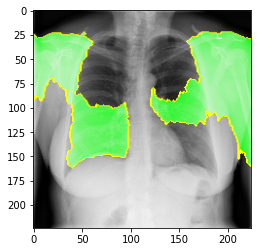


image:  1
explanation top label:  0
prediction:  0
true label:  0


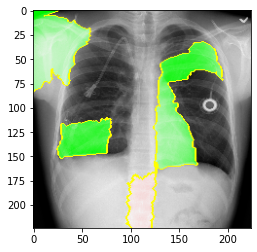


image:  2
explanation top label:  0
prediction:  0
true label:  0


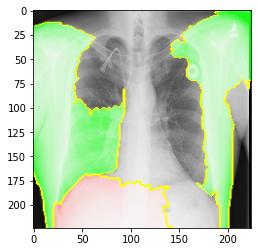

In [0]:

for i in range(231):
  explanation = lime_explainer.explain_instance(image=testX[i], classifier_fn=lime_predict, top_labels=1, hide_color=0, num_samples=1000)

  print("image: ", i)
  print("explanation top label: ", explanation.top_labels[0])
  print("prediction: ", test_y_pred[i])
  print("true label: ", test_y[i])
  temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
  plt.imshow(mark_boundaries(temp, mask))
  plt.show()

In [0]:
print(explanation.top_labels[0])
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))